<a href="https://colab.research.google.com/github/Mehvishh25/CODSOFT_Machine-Learning/blob/main/Codsoft_Movie_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
columns = [ 'Title' , 'Genre' , 'Description']
column = ['Title' , 'Description']

In [ ]:
train_set= pd.read_csv('/content/train_data.txt',delimiter=':::',engine='python', names=columns,index_col=0 )

In [ ]:
train_set.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [ ]:
train_set.shape

(54214, 3)

In [ ]:
train_set.head(8)

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...


In [ ]:
train_set.isnull().sum()

,0
Title,0
Genre,0
Description,0


In [ ]:
test_set=pd.read_csv('/content/test_data.txt', delimiter=':::', engine='python',names=column, index_col=0 )

In [ ]:
test_set.describe()

,Title,Description
count,54200,54200
unique,54200,54072
top,Edgar's Lunch (1998),Grammy - music award of the American academy ...
freq,1,10


In [ ]:
test_set.shape

(54200, 2)

In [ ]:
test_set.head(8)

,Title,Description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...
6,Riddle Room (2016),Emily Burns is being held captive in a room w...
7,L'amica (1969),The beautiful but neglected wife of a brillia...
8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...


In [ ]:
test_set.isnull().sum()

,0
Title,0
Description,0


In [ ]:
print(train_set.duplicated().sum())
print(test_set.duplicated().sum())

0
0


Text(0, 0.5, 'Count')

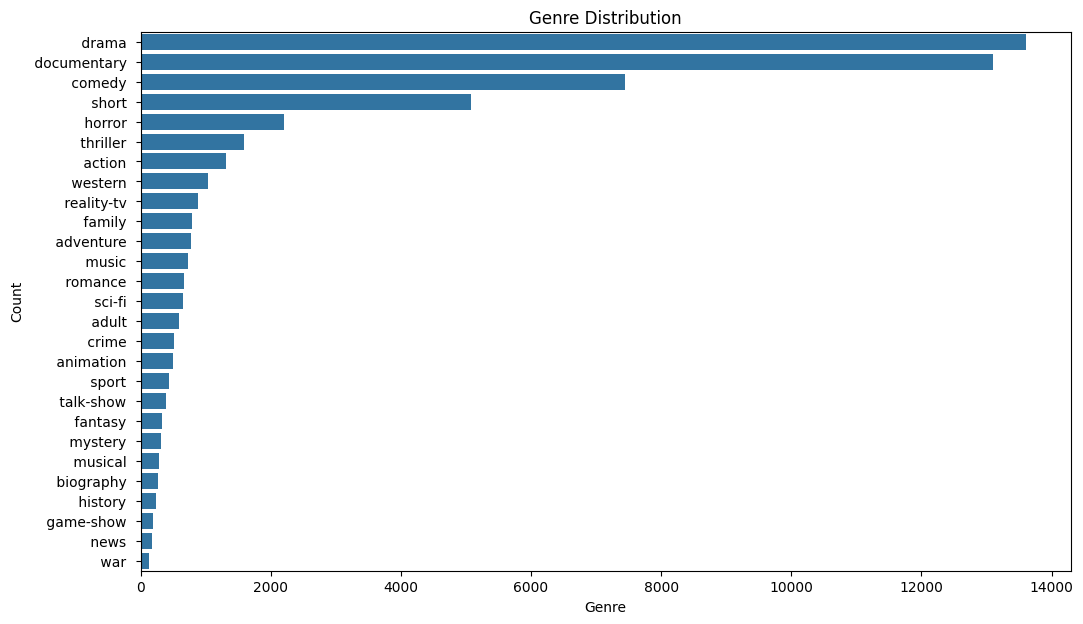

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=train_set,y='Genre',order=train_set['Genre'].value_counts().index)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')

In [ ]:
train_set['length']=train_set['Description'].apply(len)
train_set.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


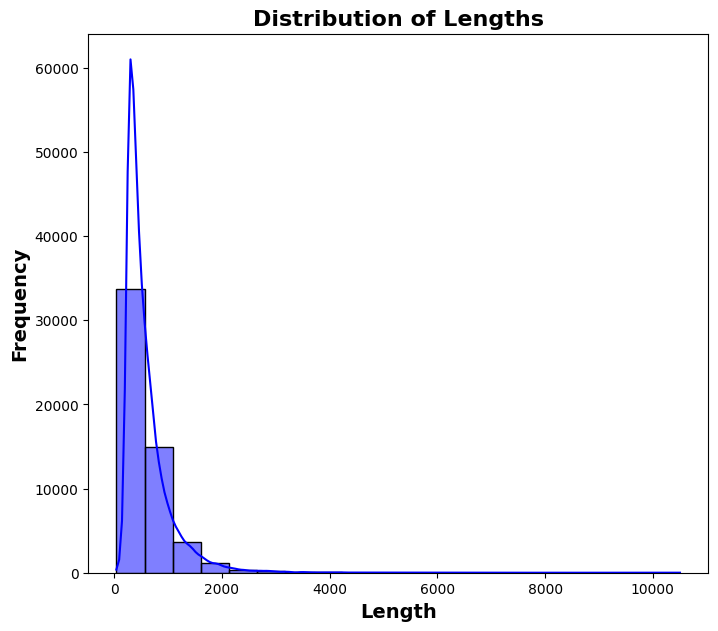

In [ ]:
plt.figure(figsize=(8, 7))

sns.histplot(data=train_set, x='length', bins=20, kde=True, color='blue')

plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

In [ ]:
def cleaning_data(text):
    # Remove mentions (@username)
    text = re.sub(r'@\S+', '', text)

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r"\s+", " ", text).strip()

    return text

# Apply cleaning to train and test sets
train_set['TextCleaning'] = train_set['Description'].apply(cleaning_data)
test_set['TextCleaning'] = test_set['Description'].apply(cleaning_data)

In [ ]:
train_set.head()

,Title,Genre,Description,length,TextCleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,The film s title refers not only to the un rec...


In [ ]:
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
X_train=tfidf.fit_transform(train_set['TextCleaning'])
X_test=tfidf.transform(test_set['TextCleaning'])

In [ ]:
x = X_train
y = train_set['Genre']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [ ]:
model1=MultinomialNB()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy_score(y_pred1,y_test)

0.5235635894125242

In [ ]:
model2=LogisticRegression()
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
accuracy_score(y_pred2,y_test)
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

pipe.score(X_test, y_test)

In [ ]:
model3=SVC()
model2.fit(X_train,y_train)
y_pred3=model2.predict(X_test)
accuracy_score(y_pred3,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5776998985520613